In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the ball positions from the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [3]:
#  Extract the ball positions from the dictionary
ball_positions = [x.get(1, []) for x in ball_positions]
# Convert the list of dictionaries to a pandas DataFrame
df_ball_positions = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])
# Interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
# Fill the remaining missing values with the last valid value
df_ball_positions = df_ball_positions.bfill()

In [4]:
# Calculate the midpoints of the ball positions
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
# Calculate the rolling mean of the midpoints
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()


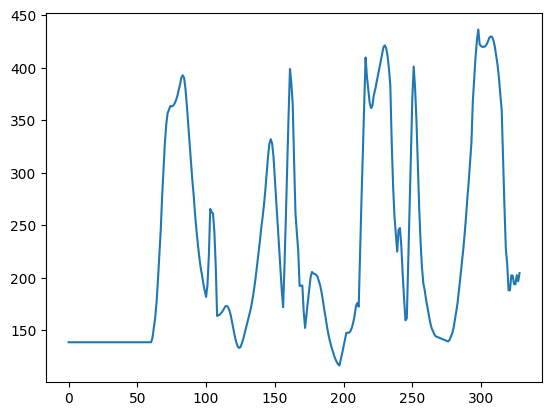

In [5]:
plt.plot(df_ball_positions['mid_y_rolling_mean'], label='mid_y_rolling_mean')

In [6]:
# Calculate the difference between the rolling mean of the midpoints
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

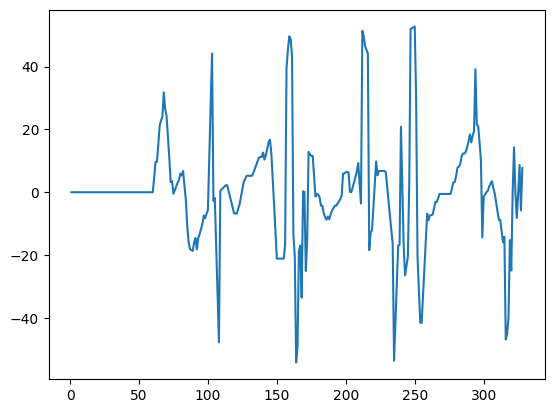

In [7]:
# Plot the difference between the rolling mean of the midpoints
plt.plot(df_ball_positions['delta_y'])

In [8]:
df_ball_positions['ball_hit'] = 0

In [9]:
# Find the frames where the ball is hit
minimum_change_frames_for_hit = 25
# Loop through the ball positions
for i in range(1, len(df_ball_positions)- int(minimum_change_frames_for_hit * 1.2)):
    # Check if the ball position changes from negative to positive or vice versa
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[i + 1] < 0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[i + 1] > 0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i + 1, i + int(minimum_change_frames_for_hit * 1.2) + 1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 and df_ball_positions['delta_y'].iloc[change_frame] < 0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 and df_ball_positions['delta_y'].iloc[change_frame] > 0

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            elif positive_position_change and positive_position_change_following_frame:
                change_count += 1
    
        if change_count > minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()

C:\Users\yuyao\AppData\Local\Temp\ipykernel_11288\1719693230.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ball_positions['ball_hit'].iloc[i] = 1
C:\Users\yuyao\AppData\Local\Temp\ipykernel_11288\1719693230.py:21: SettingWithCopyWa

In [10]:
df_ball_positions[df_ball_positions['ball_hit']==1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
197,525.878662,109.918335,537.626465,122.969971,116.444153,116.500684,-1.118392,1
251,728.907440,352.591278,743.902344,368.280579,360.435928,401.024686,30.063953,1
276,625.780701,131.802338,637.540955,144.722687,138.262512,139.355286,-0.546387,1
